## import OS and libs as well as check versions

In [41]:

import numpy

print( numpy.__version__ )
import theano

print( theano.__version__)

1.16.2
1.0.3


In [43]:
import numpy as np
np.random.seed(123)  # for reproducibility

In [44]:
import keras
print(keras.__version__)

2.2.4


In [45]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks

In [46]:
from keras.models import Sequential

In [47]:
from keras.layers import Dense, Dropout, Activation, Flatten

In [48]:

from keras.layers import Convolution2D, MaxPooling2D

In [49]:

from keras.utils import np_utils

## load hand writing raw images

In [50]:

from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
## check dim of the training set

In [51]:
print(  X_train.shape )
# (60000, 28, 28)

(60000, 28, 28)


## use matplot lib to plot demo image(s)

In [52]:
import matplotlib

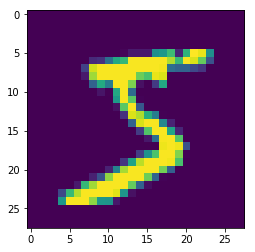

In [53]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

## reshape training set and testing set 

In [54]:

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [55]:


print( X_train.shape)
# (60000, 1, 28, 28)

(60000, 1, 28, 28)


## change type to float (32)

In [56]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [57]:

print( y_train.shape )
# (60000,)

(60000,)


In [58]:
print( y_train[:10])
# [5 0 4 1 9 2 1 3 1 4] 

[5 0 4 1 9 2 1 3 1 4]


In [59]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [60]:
print (Y_train.shape)
# (60000, 10)

(60000, 10)


 ## define model architecture

In [62]:

model = Sequential()

In [ ]:
## keras 2.2.x changed the model setup, which is tricky

In [63]:
from keras.layers import Conv2D
from keras.layers.convolutional import Deconv2D as Conv2DTranspose

In [64]:
print(keras.__version__)

2.2.4


In [65]:
model.add( Conv2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))

In [66]:

print( model.output_shape)
# (None, 32, 26, 26)

(None, 32, 26, 26)


In [67]:
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [68]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [69]:
model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(1, 28,28), data_format='channels_first')) 
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [70]:
## compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [71]:
## Fit Keras model
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)
# Epoch 1/10
# 7744/60000 [==>...........................] - ETA: 96s - loss: 0.5806 - acc: 0.8164

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
60000/60000 [==============================] - 189s 3ms/step - loss: 0.2613 - acc: 0.9208
Epoch 2/10
60000/60000 [==============================] - 191s 3ms/step - loss: 0.0754 - acc: 0.9766
Epoch 4/10
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0632 - acc: 0.9812
Epoch 5/10
60000/60000 [==============================] - 183s 3ms/step - loss: 0.0550 - acc: 0.9829
Epoch 6/10
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0474 - acc: 0.9859
Epoch 7/10
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0432 - acc: 0.9864
Epoch 8/10
60000/60000 [==============================] - 196s 3ms/step - loss: 0.0385 - acc: 0.9875
Epoch 9/10
60000/60000 [==============================] - 205s 3ms/step - loss: 0.0356 - acc: 0.9885
Epoch 10/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0314 - acc: 0.9899


## model evaluation

In [72]:
## evaluate keras model on test data

score = model.evaluate(X_test, Y_test, verbose=0)


## those packages/libs make deeplearning very simple, ==! 

In [73]:
print( score )

[0.03581084531534634, 0.9893]
